# Step-Wise Backtesting of MACD Strategy on XAUUSDm

This notebook performs a step-wise backtest of the MACD strategy on `XAUUSDm` data using Backtesting.py. We'll load the data, compute the MACD indicator, run the backtest, and visualize the results.

## Step 1: Import Libraries

In [9]:
import sys
import os
import pandas as pd
from backtesting import Backtest, Strategy
import ta
import sqlite3
import matplotlib.pyplot as plt

# Add the project root directory to sys.path
sys.path.append(os.path.abspath('../..'))

## Step 2: Load Historical Data for XAUUSDm

In [10]:
# Connect to the database
conn = sqlite3.connect('../../src/data/market_data.sqlite')

# Fetch XAUUSDm data
symbol = 'XAUUSDm'
query = f"SELECT * FROM market_data WHERE symbol='{symbol}' ORDER BY time"
data = pd.read_sql(query, conn)
conn.close()

print(f"Fetched {len(data)} rows of market data for {symbol}")
data.head()

Fetched 300 rows of market data for XAUUSDm


,time,open,high,low,close,tick_volume,spread,real_volume,symbol,timeframe
0,2025-05-26 01:00:00,3341.968,3344.590,3335.554,3341.348,8723,159,0,XAUUSDm,M30
1,2025-05-26 01:30:00,3341.389,3347.707,3339.398,3344.967,6937,159,0,XAUUSDm,M30
2,2025-05-26 02:00:00,3344.934,3350.627,3343.246,3348.011,5220,159,0,XAUUSDm,M30
3,2025-05-26 02:30:00,3347.984,3356.859,3346.947,3348.214,7035,159,0,XAUUSDm,M30
4,2025-05-26 03:00:00,3348.174,3349.990,3344.278,3344.998,5329,159,0,XAUUSDm,M30


## Step 3: Prepare Data for Backtesting.py

In [11]:
# Prepare data for Backtesting.py
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)
data = data.sort_index()

# Rename columns to match Backtesting.py requirements
data = data.rename(columns={
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'tick_volume': 'Volume'
})

# Ensure all required columns are present
if 'Volume' not in data.columns:
    data['Volume'] = 0

data.head()

,Open,High,Low,Close,Volume,spread,real_volume,symbol,timeframe
time,,,,,,,,,
2025-05-26 01:00:00,3341.968,3344.590,3335.554,3341.348,8723,159,0,XAUUSDm,M30
2025-05-26 01:30:00,3341.389,3347.707,3339.398,3344.967,6937,159,0,XAUUSDm,M30
2025-05-26 02:00:00,3344.934,3350.627,3343.246,3348.011,5220,159,0,XAUUSDm,M30
2025-05-26 02:30:00,3347.984,3356.859,3346.947,3348.214,7035,159,0,XAUUSDm,M30
2025-05-26 03:00:00,3348.174,3349.990,3344.278,3344.998,5329,159,0,XAUUSDm,M30


## Step 4: Visualize the Data

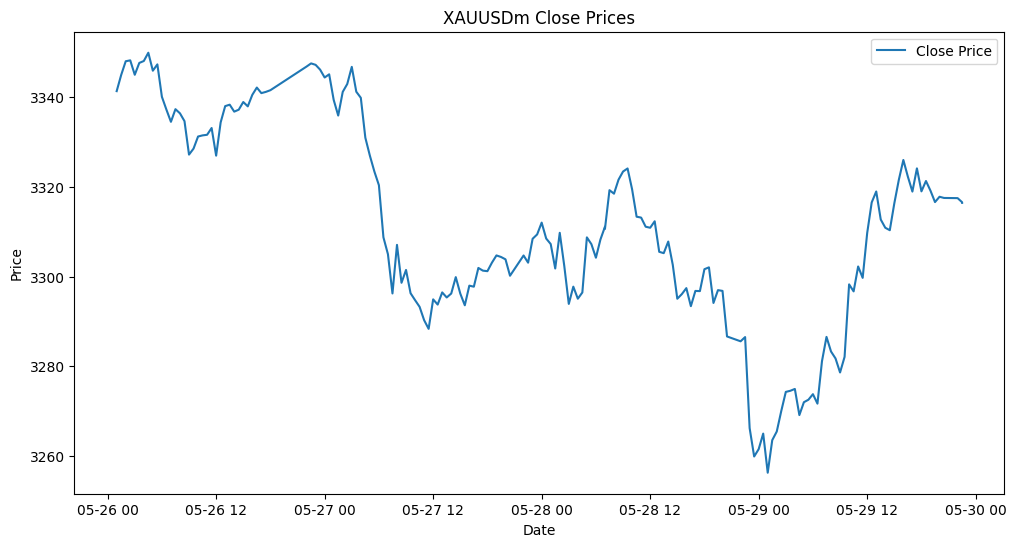

In [12]:
# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price')
plt.title(f'XAUUSDm Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Step 5: Define the MACD Strategy

In [13]:
from backtests.strategies.backtest_macd_strategy import BacktestMACDStrategy

## Step 6: Compute and Plot the MACD Indicator

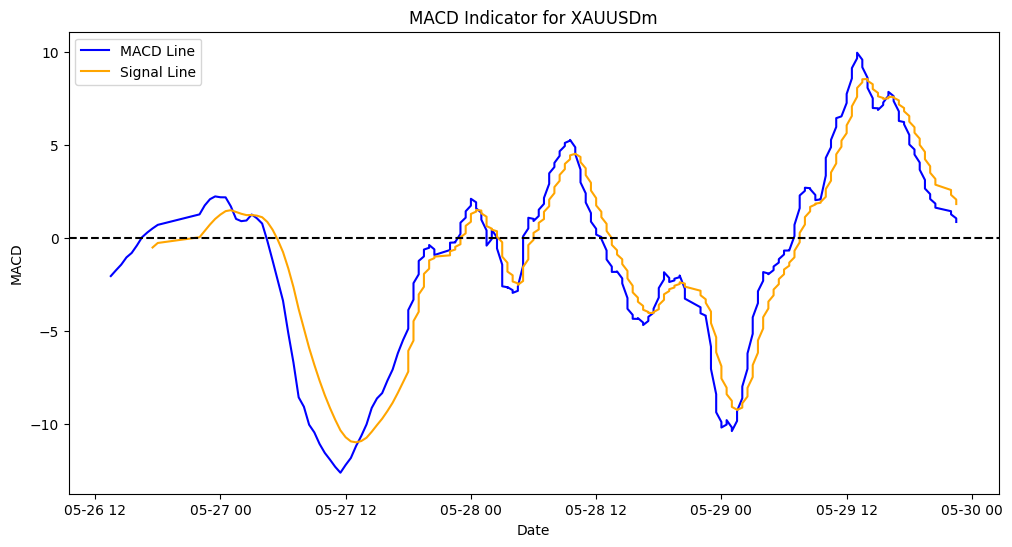

In [14]:
# Compute MACD for visualization
macd = ta.trend.MACD(data['Close'], window_fast=12, window_slow=26, window_sign=9)
macd_line = macd.macd()
signal_line = macd.macd_signal()

# Plot MACD
plt.figure(figsize=(12, 6))
plt.plot(data.index, macd_line, label='MACD Line', color='blue')
plt.plot(data.index, signal_line, label='Signal Line', color='orange')
plt.axhline(0, color='black', linestyle='--')
plt.title('MACD Indicator for XAUUSDm')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()

## Step 7: Run the Backtest

In [15]:
# Run the backtest
bt = Backtest(data, BacktestMACDStrategy, cash=10000, commission=0.001)
results = bt.run()

# Display basic stats
print(f"Total Return: {results['Return [%]']:.2f}%")
print(f"Number of Trades: {results['# Trades']}")
print(f"Win Rate: {results['Win Rate [%]']:.2f}%")

Backtest.run:   0%|          | 0/266 [00:00<?, ?bar/s]

Total Return: 0.00%
Number of Trades: 0
Win Rate: nan%


c:\Users\chept\OneDrive\Desktop\brian\fx_trading_bot\.venv\lib\site-packages\backtesting\backtesting.py:954: UserWarning: time=43: Broker canceled the relative-sized order due to insufficient margin.
  warnings.warn(
c:\Users\chept\OneDrive\Desktop\brian\fx_trading_bot\.venv\lib\site-packages\backtesting\backtesting.py:954: UserWarning: time=46: Broker canceled the relative-sized order due to insufficient margin.
  warnings.warn(
c:\Users\chept\OneDrive\Desktop\brian\fx_trading_bot\.venv\lib\site-packages\backtesting\backtesting.py:954: UserWarning: time=47: Broker canceled the relative-sized order due to insufficient margin.
  warnings.warn(
c:\Users\chept\OneDrive\Desktop\brian\fx_trading_bot\.venv\lib\site-packages\backtesting\backtesting.py:954: UserWarning: time=67: Broker canceled the relative-sized order due to insufficient margin.
  warnings.warn(
c:\Users\chept\OneDrive\Desktop\brian\fx_trading_bot\.venv\lib\site-packages\backtesting\backtesting.py:954: UserWarning: time=112: 

## Step 8: Plot the Backtest Results

In [ ]:
# Ensure the results directory exists
results_dir = os.path.abspath('../results')
os.makedirs(results_dir, exist_ok=True)

# Plot the backtest results (interactive HTML plot)
output_file = os.path.join(results_dir, 'equity_curve_macd_XAUUSDm.html')
bt.plot(filename=output_file, open_browser=False)
print(f"Equity curve saved to {output_file}")